#Introduction
###Heart attack analysis, also known as heart disease prediction or cardiovascular disease prediction, is a critical application of data science and machine learning aimed at predicting the likelihood of an individual experiencing a heart attack based on various factors and indicators. This analysis typically involves the use of datasets containing information about patients' medical history, lifestyle habits, physiological measurements, and other relevant features.

###The goal of heart attack analysis is to develop predictive models that can accurately classify individuals into different risk categories, such as low, medium, or high risk of experiencing a heart attack within a certain timeframe. Decision tree algorithms are commonly used in this context due to their ability to handle both numerical and categorical data, as well as their interpretability, which allows healthcare professionals to understand and explain the reasoning behind the predictions.

###By leveraging advanced analytics techniques, heart attack analysis can help healthcare providers identify high-risk individuals early on, allowing for proactive intervention strategies such as lifestyle modifications, medication management, and targeted monitoring. This ultimately contributes to reducing the incidence of heart attacks and improving patient outcomes.

#About the Dataset

###age: Age of the patient
###sex: Gender of the patient
###cp: Chest pain type, 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic
###trtbps: Resting blood pressure (in mm Hg)
###chol: Cholestoral in mg/dl fetched via BMI sensor
###fbs: (fasting blood sugar > 120 mg/dl), 1 = True, 0 = False
###restecg: Resting electrocardiographic results, 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy
###thalachh: Maximum heart rate achieved
###oldpeak: Previous peak
###slp: Slope
###caa: Number of major vessels
###thall: Thalium Stress Test result ~ (0,3)
###exng: Exercise induced angina ~ 1 = Yes, 0 = No
###output: Target variable


#Importing Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings("ignore")

##Loading the Dataset

In [3]:
df= pd.read_csv("heart.csv")

In [18]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

##Analyzing the Dataset

In [4]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


##Checking the shape of the Dataset

In [5]:
df.shape

(303, 14)

## Checking if there is any Null value in the Data

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

###There is no Null value in the Dataframe

In [17]:
#Checking for unique data
df.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


###All attributes are of type 'int' except 'oldpeak'

In [11]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

if duplicate_rows.empty:
    print("No duplicate values found.")
else:
    print("Duplicate values found:")
    print(duplicate_rows)


Duplicate values found:
     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
164   38    1   2     138   175    0        1       173     0      0.0    2   

     caa  thall  output  
164    4      2       1  


###Dropping the Duplicates


In [12]:
df.drop_duplicates(inplace=True)

In [15]:
df.shape

(302, 14)

In [13]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [14]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


###Computing the correlation matrix

In [16]:
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trtbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalachh,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exng,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


###The code df.corr() computes the correlation matrix for the variables in the DataFrame df. In other words, it calculates the correlation coefficients between all pairs of numerical columns in the DataFrame.

###Each cell in the correlation matrix represents the correlation coefficient between two variables. The correlation coefficient ranges from -1 to 1, where:

###1 indicates a perfect positive correlation (as one variable increases, the other also increases).
###-1 indicates a perfect negative correlation (as one variable increases, the other decreases).
###0 indicates no correlation between the variables.
###Here's what the output of df.corr() represents:

###If the value is close to 1, it suggests a strong positive correlation.
###If the value is close to -1, it suggests a strong negative correlation.
###If the value is close to 0, it suggests no correlation.

##Data preprocessing

In [21]:
df=df.iloc[:, :14]
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


##There's no need for categorical encoding

In [28]:
x= df.iloc[:, 1:-1].values
y= df.iloc[:,-1].values
x, y

(array([[  1.,   3., 145., ...,   0.,   0.,   1.],
        [  1.,   2., 130., ...,   0.,   0.,   2.],
        [  0.,   1., 130., ...,   2.,   0.,   2.],
        ...,
        [  1.,   0., 144., ...,   1.,   2.,   3.],
        [  1.,   0., 130., ...,   1.,   1.,   3.],
        [  0.,   1., 130., ...,   1.,   1.,   2.]]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0,

##Splitting the data for Train and Test

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state= 42)

In [46]:
print('Shape of the training data', x_train.shape, y_train.shape)
print('Shape of the test data', x_test.shape, y_test.shape)

Shape of the training data (211, 12) (211,)
Shape of the test data (91, 12) (91,)


In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
# Initialize the decision tree classifier
dt_classifier = DecisionTreeClassifier(max_depth=None, min_samples_leaf=1, criterion='gini')

# Fit the classifier to the training data
dt_classifier.fit(x_train, y_train)

# Predict on the testing data
y_pred = dt_classifier.predict(x_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8461538461538461


In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:", f1)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8461538461538461
Precision: 0.8473441452164858
Recall: 0.8461538461538461
F1-score: 0.8463401908169351

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84        42
           1       0.87      0.84      0.85        49

    accuracy                           0.85        91
   macro avg       0.85      0.85      0.85        91
weighted avg       0.85      0.85      0.85        91



###These scores are commonly used to evaluate the performance of a classification model. Here's a brief interpretation of each metric:

###Accuracy: This metric represents the proportion of correctly classified instances out of the total instances. In this case, the accuracy is approximately 0.846, indicating that around 84.6% of the instances were classified correctly by the model.

###Precision: Precision measures the proportion of true positive predictions out of all positive predictions made by the model. A precision score of approximately 0.847 suggests that when the model predicts a positive outcome, it is correct around 84.7% of the time.

###Recall (Sensitivity): Recall measures the proportion of true positive predictions out of all actual positive instances in the dataset. A recall score of approximately 0.846 indicates that the model correctly identifies around 84.6% of all actual positive instances.

###F1-score: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall, giving equal weight to both metrics. A higher F1-score indicates better performance, and in this case, the F1-score is approximately 0.846.

###Classification Report: This section provides a detailed breakdown of precision, recall, and F1-score for each class (in this case, classes 0 and 1). It also includes support, which represents the number of instances of each class in the dataset.

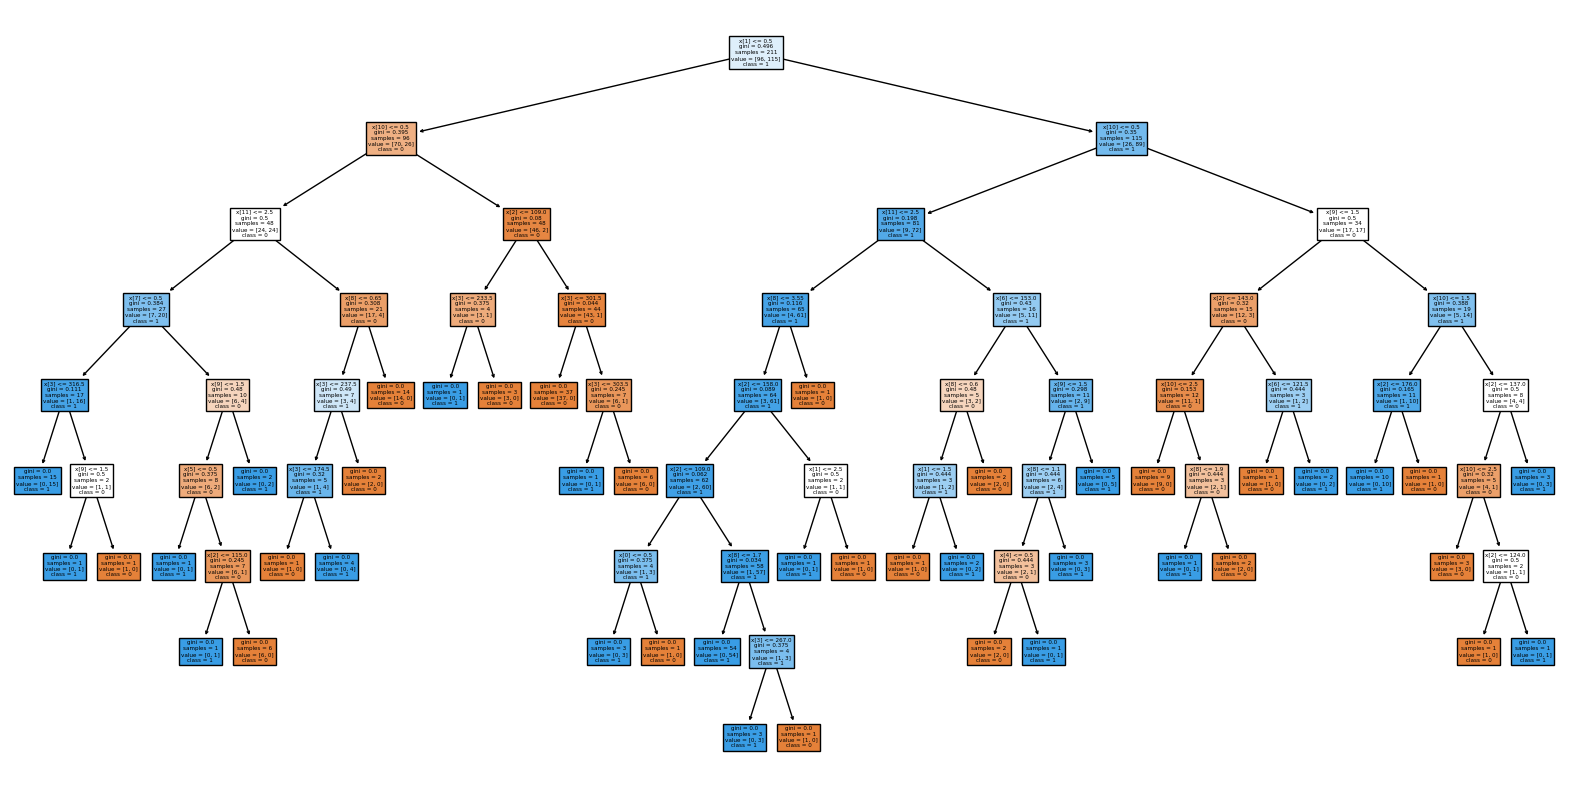

In [49]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Generate predictions using the decision tree classifier
predictions = dt_classifier.predict(x_test)

# Access the classes_ attribute to get the class names
class_names = dt_classifier.classes_.astype(str)

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, class_names=class_names, filled=True)
plt.show()

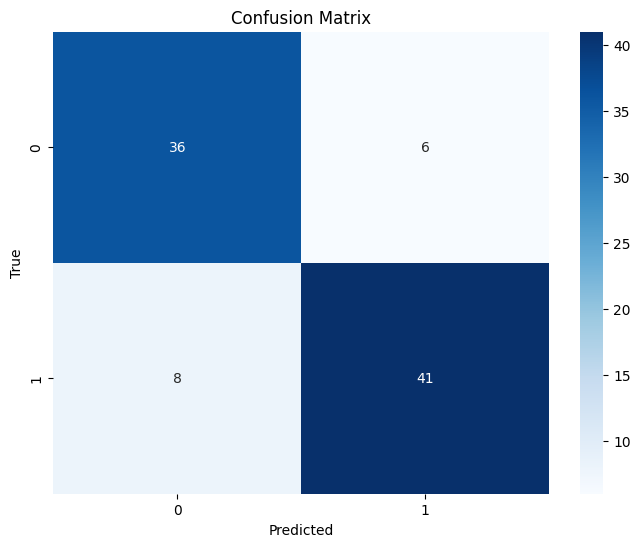

In [50]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=dt_classifier.classes_, yticklabels=dt_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [51]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
scores = cross_val_score(dt_classifier, x, y, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:", scores)

# Calculate and print mean cross-validation score
mean_score = scores.mean()
print("Mean cross-validation score:", mean_score)

Cross-validation scores: [0.75409836 0.81967213 0.78333333 0.75       0.76666667]
Mean cross-validation score: 0.7747540983606557


###These cross-validation scores are typically obtained by performing k-fold cross-validation on a machine learning model. Here's the interpretation:

###1) Cross-validation scores: These are the accuracy scores obtained for each fold of cross-validation. In k-fold cross-validation, the dataset is split into k subsets (or folds), and the model is trained and evaluated k times, with each fold used as the testing set once and the remaining folds as the training set.

###The cross-validation scores provided are:
###0.75409836
###0.81967213
####0.78333333
###0.75
####0.76666667
###These scores represent the accuracy achieved by the model on each fold of the cross-validation process. They can vary depending on the particular subset of data used for training and testing in each fold.

###2) Mean cross-validation score: This is the average of the cross-validation scores obtained across all folds. In this case, the mean cross-validation score is approximately 0.775.

The mean cross-validation score provides an overall assessment of the model's performance across multiple iterations of cross-validation. It gives an indication of how well the model is expected to perform on unseen data, providing more robustness than a single train-test split.

Overall, a mean cross-validation score of 0.775 suggests that the model's performance is reasonably consistent across different subsets of the data, indicating that it is likely to generalize well to new, unseen data.